In [1505]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanictxt/titanic.txt


# Pandas <br>

<img src=https://cdn.shortpixel.ai/spai/w_425+q_lossy+ret_img+to_webp/https://www.numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png><br>
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. Mainly use for data-preprocessing & data exploration. After finished pandas preprocessing, Aj.Ple really recommend to transfer data back into NumPy array format for Machine Learning Task.

### 1. Load Data

In [1506]:
import pandas as pd 

In [1507]:
# Data Flame
df = pd.read_csv('../input/titanictxt/titanic.txt', sep='\t', header = 0)
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


### 2. Access Data & Basic Functions

In [1508]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived'],
      dtype='object')

In [1509]:
df['Name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: Name, Length: 1309, dtype: object

In [1510]:
df.iloc[2,0:5] # ดู colum 0 ถึง 5 ของคนที่ 2 หรือ row 2

Passenger Class                                              First
Name                                  Allison, Miss. Helen Loraine
Sex                                                         Female
Age                                                              2
No of Siblings or Spouses on Board                               1
Name: 2, dtype: object

In [1511]:
df.loc[2,'Passenger Class':'Age']

Passenger Class                           First
Name               Allison, Miss. Helen Loraine
Sex                                      Female
Age                                           2
Name: 2, dtype: object

In [1512]:
df.dtypes

Passenger Class                        object
Name                                   object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board      int64
No of Parents or Children on Board      int64
Ticket Number                          object
Passenger Fare                        float64
Cabin                                  object
Port of Embarkation                    object
Life Boat                              object
Survived                               object
dtype: object

In [1513]:
df['Age'].max()

80.0

In [1514]:

df['Age'].min()

0.1667

In [1515]:
df[ df['Age'] == df['Age'].min() ] #ดูข้อมูลของตำแหน่งที่อายุน้อยที่สุด

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
763,Third,"Dean, Miss. Elizabeth Gladys 'Millvina'",Female,0.1667,1,2,C.A. 2315,20.575,NaN,Southampton,10,Yes


In [1516]:

df['Name']  [df['Age'] == df['Age'].max()] # ชื่อของคนที่อายุมากที่สุด เอาแค่ชื่อ

14    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

In [1517]:
df.shape

(1309, 12)

In [1518]:
df['Sex'].tolist()

['Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 '

In [1519]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [1520]:
df['Label'] = df['Age'] >= 20 #เพิ่ม column 13 เพื่อบอกว่าคนที่อายุมากกว่า 20
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes,True
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes,False
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No,True
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No,True


### 3. Check Missing Values

In [1521]:
df.isnull() # เช็คค่าเปล่า

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,True,False,False


In [1522]:
df.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Ticket Number                         False
Passenger Fare                         True
Cabin                                  True
Port of Embarkation                    True
Life Boat                              True
Survived                              False
Label                                 False
dtype: bool

In [1523]:
df.isnull().sum()

Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
Label                                    0
dtype: int64

In [1524]:
df['Passenger Fare'].isnull().sum()

1

In [1525]:
df.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Ticket Number                         False
Passenger Fare                         True
Cabin                                  True
Port of Embarkation                    True
Life Boat                              True
Survived                              False
Label                                 False
dtype: bool

### 4. Remove Values

In [1526]:
df_clean = df
df_clean = df_clean.drop('Cabin',1)
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare',
       'Port of Embarkation', 'Life Boat', 'Survived', 'Label'],
      dtype='object')

In [1527]:
df_clean = df_clean.dropna(1,'any') # drop column

In [1528]:
df_clean = df_clean.dropna(0,'any') # drop row

In [1529]:
df_clean.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Survived                              False
Label                                 False
dtype: bool

### 5. Replace values

In [1530]:
df_clean['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [1531]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,First,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,First,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",F,1,0,No,False
1305,Third,"Zabour, Miss. Thamine",F,1,0,No,False
1306,Third,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,Third,"Zakarian, Mr. Ortin",M,0,0,No,True


### 6. Replace string values to unique integers

In [1532]:
p_class, levels = pd.factorize(df_clean['Passenger Class']) # 

In [1533]:
p_class

array([0, 0, 0, ..., 2, 2, 2])

In [1534]:
levels

Index(['First', 'Second', 'Third'], dtype='object')

In [1535]:
df_clean['Passenger Class'] = p_class + 1
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,1,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,1,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,1,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,1,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",F,1,0,No,False
1305,3,"Zabour, Miss. Thamine",F,1,0,No,False
1306,3,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,3,"Zakarian, Mr. Ortin",M,0,0,No,True


In [1536]:
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                   object
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                              object
Label                                   bool
dtype: object

In [1537]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                    int64
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                               int64
Label                                   bool
dtype: object

factorize เป็นการเปลี่ยน types ให้เป้นตัวเลขให้มากที่สุด

### 7. Set Index

In [1538]:
df_clean = df_clean.set_index('Name')
df_clean

,Passenger Class,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
Name,,,,,,
"Allen, Miss. Elisabeth Walton",1,0,0,0,0,True
"Allison, Master. Hudson Trevor",1,1,1,2,0,False
"Allison, Miss. Helen Loraine",1,0,1,2,1,False
"Allison, Mr. Hudson Joshua Creighton",1,1,1,2,1,True
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,1,2,1,True
...,...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,1,0,1,False
"Zabour, Miss. Thamine",3,0,1,0,1,False
"Zakarian, Mr. Mapriededer",3,1,0,0,1,True


### 8. Cross Tab Plot

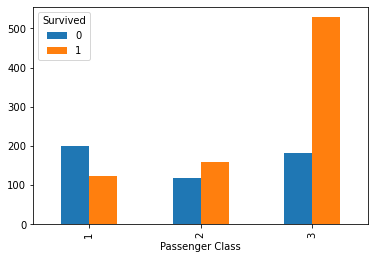

In [1539]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

### Ex. 1 Please load this Clinic data from https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv and perform preprocessing as follows :

1. Set index of data to hn numbers <br>
2. Remove missing values <br>
3. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo <br>
4. Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)
5. Separate data into groups based on pmmet values <br>
6. for each group, randomly choose 10 data 

In [1540]:
# ex.1.1
df_clinic = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df_clinic

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1541]:
# ex.1.2
df_clinic = df_clinic.dropna(0,'any') # มันจะ drop ข้อมูลที่ว่างออกไป สังเกตุจาก เลขลำดับ
df_clinic

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
1694,3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
1695,3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0


In [1542]:
#ex.1.3
df_clinic =  df_clinic.drop(['hiv', 'size', 'utmet', 'vgmet', 'surgery', 'pchemo'],1)
df_clinic.columns

Index(['hn', 'age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [1543]:
#ex.1.4
df_clinic['age'] = df_clinic['age'] <= 20
df_clinic['age'] = df_clinic['age'].replace(True,'Young').replace(False,'Old')
df_clinic

,hn,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
0,2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
3,2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
4,2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
5,2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
1694,3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
1695,3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0
1718,3169688,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,42.0,5.0,2.0,0.0,0.0,0.0,2.0


In [1544]:
#ex.1.5
df_by_pmmet = df_clinic.groupby('pmmet')
df_by_pmmet.describe().head()

hn                                                                \
       count          mean            std       min         25%        50%   
pmmet                                                                        
0.0    803.0  3.035772e+06  419190.808952  743801.0  2767047.00  3040072.0   
1.0    232.0  3.052982e+06  532127.276618  377585.0  2791915.25  3147273.5   

                            parity            ... pelvicme      adnmet  \
             75%        max  count      mean  ...      75%  max  count   
pmmet                                         ...                        
0.0    3312486.5  3813621.0  803.0  2.066002  ...      0.0  3.0  803.0   
1.0    3397386.0  3855674.0  232.0  2.073276  ...      1.0  1.0  232.0   

                                                    
           mean       std  min  25%  50%  75%  max  
pmmet                                               
0.0    0.463263  0.839833  0.0  0.0  0.0  0.0  2.0  
1.0    0.331897  0.725073  0.0  0.0  0.0  0.0  2.0  

[2 rows x 128 columns]

In [1548]:
#ex.1.6
df_by_pmmet_rand10 = df_clinic.groupby('pmmet').sample(10)
df_by_pmmet_rand10.sort_values(by = ['pmmet'])

,hn,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
869,3150181,Old,1,0.0,0,0.0,5.0,2.0,5.0,3.0,1.0,26.0,2.0,2.0,0.0,0.0,0.0,2.0
1284,2512245,Old,1,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,39.0,2.0,3.0,0.0,0.0,0.0,0.0
717,3042888,Old,2,0.0,1,0.0,5.0,1.0,5.0,7.0,3.0,19.0,999.0,3.0,0.0,0.0,0.0,0.0
998,3250828,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,42.0,1.0,3.0,0.0,0.0,0.0,2.0
1387,3523088,Old,0,0.0,0,0.0,0.0,5.0,4.0,0.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,2.0
713,3033591,Old,1,0.0,0,0.0,4.0,2.0,4.0,4.0,1.0,41.0,999.0,3.0,0.0,0.0,0.0,2.0
1283,3236514,Old,2,1.0,0,1.0,0.0,5.0,4.0,0.0,2.0,16.0,0.0,3.0,0.0,0.0,0.0,0.0
1407,3541873,Old,3,0.0,0,0.0,5.0,4.0,5.0,4.0,1.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
369,2796024,Old,1,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,21.0,0.0,3.0,0.0,0.0,0.0,2.0
1550,3087166,Old,5,1.0,0,0.0,4.0,1.0,6.0,4.0,3.0,26.0,5.0,3.0,0.0,1.0,0.0,0.0


### Ex. 2 P Please explore this dataset and report at least 5 facts about this dataset

In [1555]:
#ex2.0
df_clinic_plot = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)

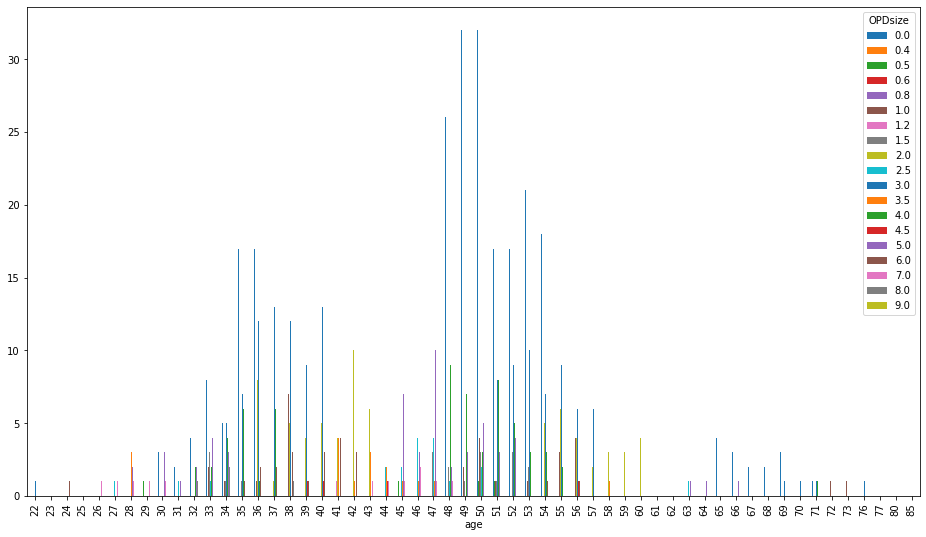

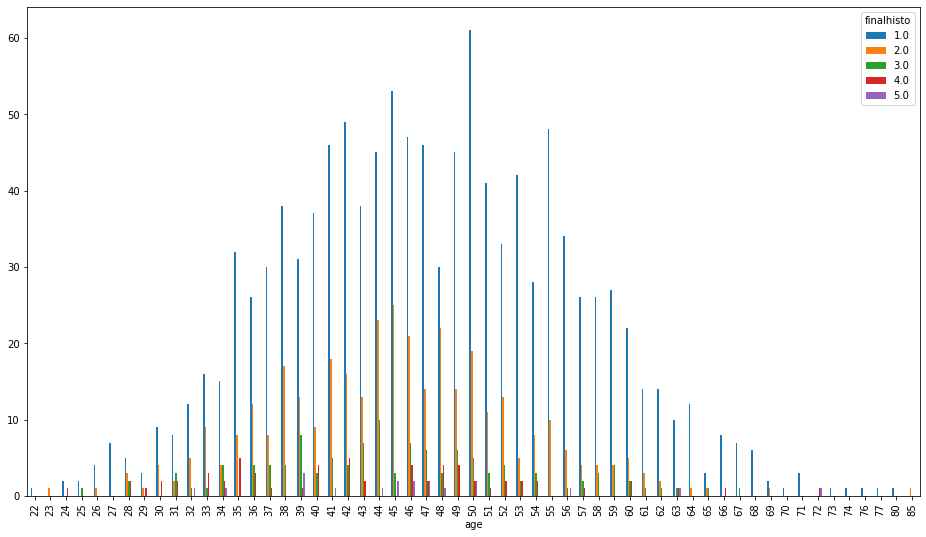

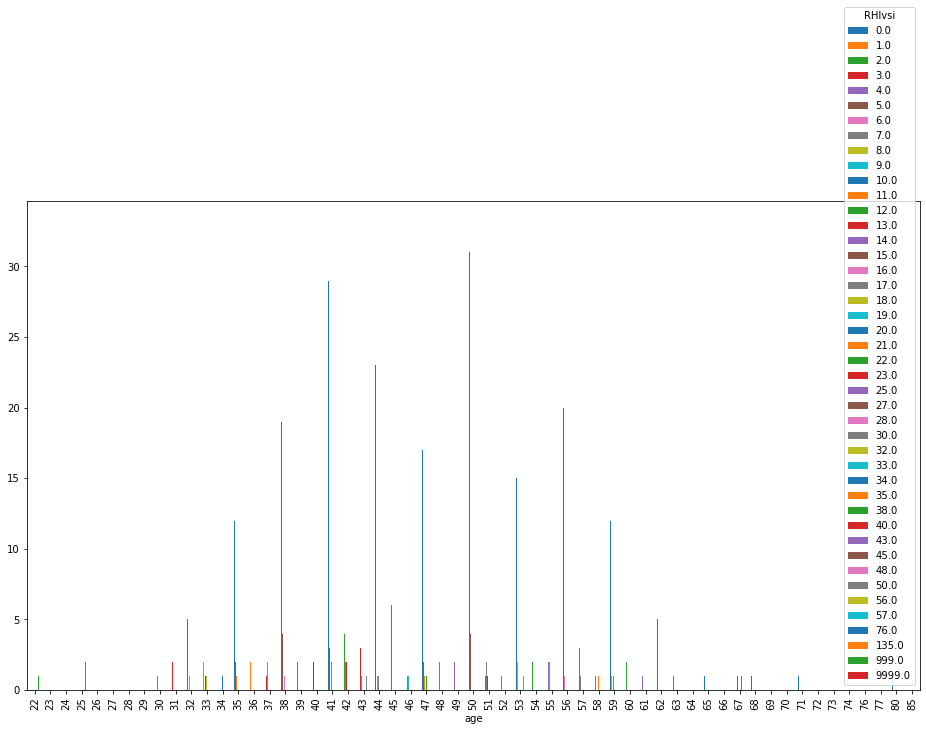

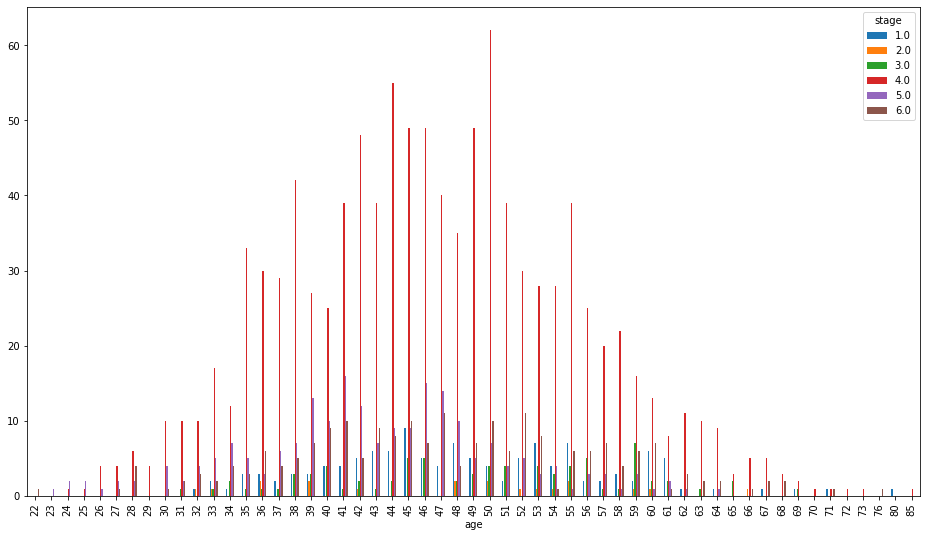

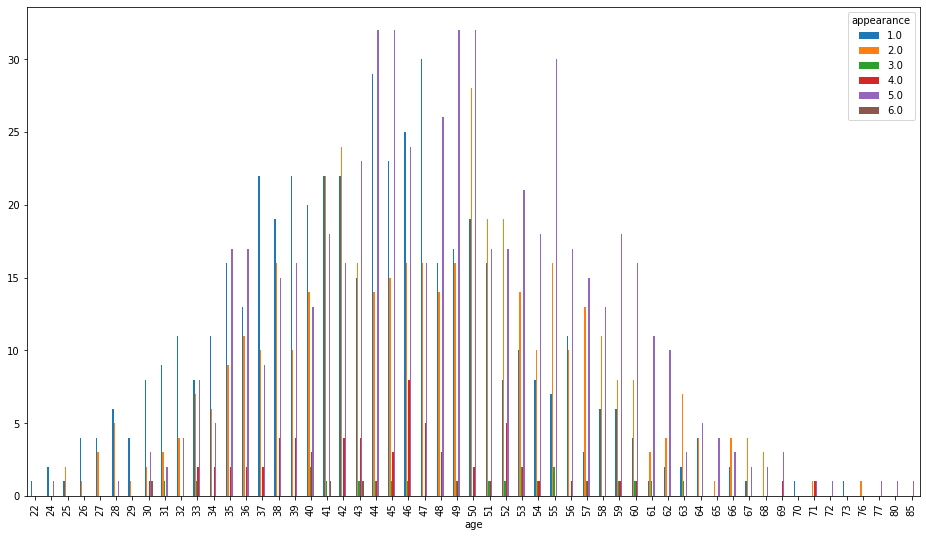

In [1557]:
pd.crosstab(df_clinic_plot['age'],df_clinic_plot['OPDsize']).plot(kind='bar',figsize=(16,9))
pd.crosstab(df_clinic_plot['age'],df_clinic_plot['finalhisto']).plot(kind='bar',figsize=(16,9))
pd.crosstab(df_clinic_plot['age'],df_clinic_plot['RHlvsi']).plot(kind='bar',figsize=(16,9))
pd.crosstab(df_clinic_plot['age'],df_clinic_plot['stage']).plot(kind='bar',figsize=(16,9))
pd.crosstab(df_clinic_plot['age'],df_clinic_plot['appearance']).plot(kind='bar',figsize=(16,9))